In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, expon

In [2]:
train_dataset_path = 'C:/Users/katsa/OneDrive/Jupyter_files/shallow_models_cic_nb15/nb_12_feat_train_dataset.csv'
nb_train_dataset = pd.read_csv(train_dataset_path)
nb_train_dataset = nb_train_dataset.sample(frac=1/20)
X_train, y_train = nb_train_dataset.drop('Label', axis=1), nb_train_dataset['Label']

BENIGN    17879
ATTACK     2441
Name: Label, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


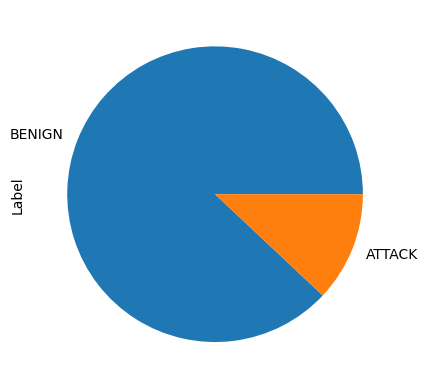

In [3]:
print(y_train.value_counts())
print(y_train.value_counts().plot.pie())

In [4]:
# Create a pipeline with SimpleImputer, StandardScaler, and DecisionTreeClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier())
])

# Define the hyperparameter grid to search over
param_grid = {
    'clf__max_iter': [1000],
    'clf__hidden_layer_sizes': [(20,), (40,), (50,), (60,), (70,), (85,), (100,)]
}

# # Create a GridSearchCV object with the pipeline and hyperparameter grid
# grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
# # Fit the GridSearchCV object on your training data
# grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
# print("Best parameters: {}".format(grid_search.best_params_))
# print("Best score: {:.2f}".format(grid_search.best_score_))

# Perform randomized search
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_
best_score = random_search.best_score_

print("Best parameters: {}".format(best_params))
print("Best estimator: {}".format(best_model))
print("Best score: {:.2f}".format(best_score))

C:\Users\katsa\miniconda3\envs\thesis\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'clf__max_iter': 1000, 'clf__hidden_layer_sizes': (85,)}
Best estimator: Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('clf',
                 MLPClassifier(hidden_layer_sizes=(85,), max_iter=1000))])
Best score: 0.98


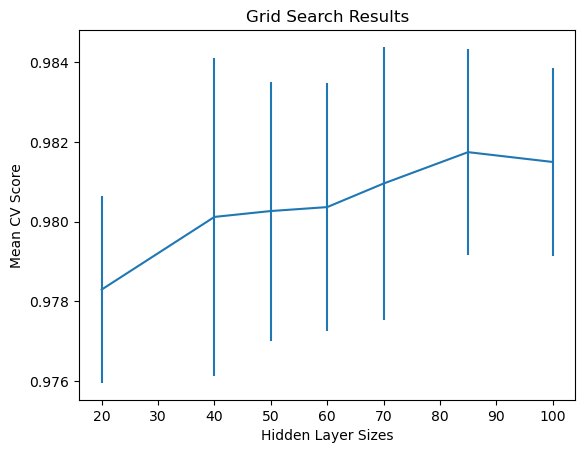

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the mean cross-validation scores and standard deviations
mean_scores = random_search.cv_results_['mean_test_score']
std_scores = random_search.cv_results_['std_test_score']

# Extract the hyperparameters
params = random_search.cv_results_['params']
hidden_layer_sizes = [param['clf__hidden_layer_sizes'][0] for param in params]

# Plot the results
plt.errorbar(hidden_layer_sizes, mean_scores, yerr=std_scores)
plt.title("Grid Search Results")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("Mean CV Score")
plt.show()